#Tea Leaf Disease Classification

* This dataset has been downloaded from kaggle:https://www.kaggle.com/datasets/shashwatwork/identifying-disease-in-tea-leafs.

* The dataset contains classes of seven Common diseases of TeaLeaves.

   * Red leaf spot.

   * Algal leaf spot.

   * Bird’s eyespot.

   * Gray blight.

   * White spot.

   * Anthracnose.

   * Brown blight.





* It also include healthy tea leave classe as well.

* Each of these Classes have  more than 100 images.


#Libraries needed

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
torch.__version__

'2.0.1+cpu'

#Setting up device Agostic code

In [2]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

#Download Dataset From kaggle

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload() # files can be uploaded from internal storage

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"suryavr","key":"0a329125bbc9b73c35fbd61353191231"}'}

In [ ]:
!rm -r ~/.kaggle   # remove incase any previous directories

In [ ]:

!mkdir ~/.kaggle #make new directory
!cp /content/kaggle.json ~/.kaggle # copy the json file to the new directory
!chmod 600 ~/.kaggle/kaggle.json # change file permission 600-indicates that it can be accessed by it's owner

In [ ]:
!kaggle datasets download -d shashwatwork/identifying-disease-in-tea-leafs

100% 739M/740M [00:27<00:00, 31.2MB/s]
100% 740M/740M [00:27<00:00, 28.1MB/s]


#Getting data Ready

In [ ]:
from pathlib import Path
import shutil
import zipfile

In [ ]:
path=Path("Dataset")
target_path=path/"tea.zip"

path.mkdir(parents=True,exist_ok=True)

source_path="/content/identifying-disease-in-tea-leafs.zip"
print("Copying....")
shutil.copy2(source_path,target_path)



Copying....


PosixPath('Dataset/tea.zip')

In [ ]:
with zipfile.ZipFile(target_path) as file:
  file.extractall(path/"Tea")
  print("Extracted")

Extracted


In [ ]:
!rm -r /content/Dataset/tea.zip

In [ ]:
import random
import os

In [ ]:
imagepath=path/"Tea/tea sickness dataset"
images=list(imagepath.glob("*/*.jpg"))
len(images)

885

In [ ]:
for image in random.sample(images,k=9):
  print(image)

Dataset/Tea/tea sickness dataset/algal leaf/UNADJUSTEDNONRAW_thumb_3a.jpg
Dataset/Tea/tea sickness dataset/gray light/IMG_20220503_135447.jpg
Dataset/Tea/tea sickness dataset/healthy/UNADJUSTEDNONRAW_thumb_21d.jpg
Dataset/Tea/tea sickness dataset/white spot/UNADJUSTEDNONRAW_thumb_91.jpg
Dataset/Tea/tea sickness dataset/white spot/UNADJUSTEDNONRAW_thumb_ae.jpg
Dataset/Tea/tea sickness dataset/white spot/UNADJUSTEDNONRAW_thumb_ec.jpg
Dataset/Tea/tea sickness dataset/algal leaf/UNADJUSTEDNONRAW_thumb_10.jpg
Dataset/Tea/tea sickness dataset/gray light/IMG_20220503_140634.jpg
Dataset/Tea/tea sickness dataset/brown blight/UNADJUSTEDNONRAW_thumb_171.jpg


In [ ]:
count=0
for dirpath,dirnames,files in os.walk(imagepath):
  count+=len(files)
  print(f"There are {len(dirnames)} and files {len(files)} in {dirpath}")

There are 8 and files 0 in Dataset/Tea/tea sickness dataset
There are 0 and files 100 in Dataset/Tea/tea sickness dataset/gray light
There are 0 and files 113 in Dataset/Tea/tea sickness dataset/algal leaf
There are 0 and files 143 in Dataset/Tea/tea sickness dataset/red leaf spot
There are 0 and files 142 in Dataset/Tea/tea sickness dataset/white spot
There are 0 and files 74 in Dataset/Tea/tea sickness dataset/healthy
There are 0 and files 113 in Dataset/Tea/tea sickness dataset/brown blight
There are 0 and files 100 in Dataset/Tea/tea sickness dataset/bird eye spot
There are 0 and files 100 in Dataset/Tea/tea sickness dataset/Anthracnose


In [ ]:
count


885

In [ ]:
torch.manual_seed(42)

train_len=0.8


In [ ]:
!pip install split_folders

In [ ]:
import splitfolders

input_folder = imagepath #Enter Input Folder
output = path/"Actual" #Enter Output Folder

splitfolders.ratio(input_folder, output=output, seed=42, ratio=(0.8,0.2))

Copying files: 885 files [00:02, 410.69 files/s] 


In [ ]:
!rm -r /content/Dataset/Tea

In [ ]:
train_path=output/"train"
test_path=output/"val"
train_path,test_path

(PosixPath('Dataset/Actual/train'), PosixPath('Dataset/Actual/val'))

In [ ]:
count=0
for dirpath,dirnames,files in os.walk(test_path):
  count+=len(files)
  print(f"There are {len(dirnames)} and files {len(files)} in {dirpath}")

count

There are 8 and files 0 in Dataset/Actual/val
There are 0 and files 20 in Dataset/Actual/val/gray light
There are 0 and files 23 in Dataset/Actual/val/algal leaf
There are 0 and files 29 in Dataset/Actual/val/red leaf spot
There are 0 and files 29 in Dataset/Actual/val/white spot
There are 0 and files 15 in Dataset/Actual/val/healthy
There are 0 and files 23 in Dataset/Actual/val/brown blight
There are 0 and files 20 in Dataset/Actual/val/bird eye spot
There are 0 and files 20 in Dataset/Actual/val/Anthracnose


179

In [ ]:
from PIL import Image

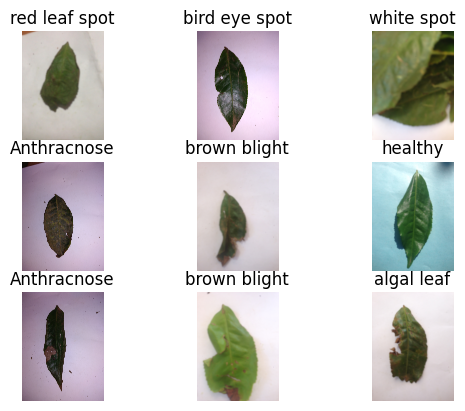

In [ ]:
def visualization(data:Path,number_of_images:int):

  images=random.sample(list(data.glob("*/*.jpg",)),k=number_of_images)

  col=number_of_images//3
  for count,image in enumerate(images,start=1):
    plt.subplot(3,col,count)
    plt.imshow(Image.open(image))
    plt.title(image.parent.stem)
    plt.axis("off")
visualization(test_path,9)

#creating dataloaders and datasets

In [ ]:
import torchvision
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision.models import EfficientNet_B0_Weights
from torchvision import transforms,datasets

In [ ]:
def datasets_dataloaders_creation(train_data_path:Path,
                                  test_data_path:Path,
                                   batchsize:int,
                                  transform:torchvision.transforms=None

                                  ):
  train_dataset=ImageFolder(root=train_data_path,transform =transform)
  test_dataset=ImageFolder(root=test_data_path,transform =transform)


  train_data_loader=DataLoader(dataset=train_dataset,
                               batch_size=batchsize,
                               pin_memory=True,
                               shuffle=True)
  test_data_loader=DataLoader(dataset=test_dataset,
                               batch_size=batchsize,
                               pin_memory=True,
                               shuffle=True)
  return train_data_loader,test_data_loader,train_dataset.classes

In [ ]:
!pip install torchinfo

In [ ]:
from torchinfo import summary
from torchvision.models import efficientnet_b0

In [ ]:
def summary_checker(model,input_size):
   return summary(model,input_size=input_size,col_names=["output_size",
"num_params",
"trainable",])

In [ ]:
def train_loop(data:torch.utils.data,
               model:torch.nn,
               loss_fn:torch.nn,
               optimizer:torch.optim,
               accuracy,
               device):
  model.train()

  trainloss,trainaccuracy=0,0
  for x,y in data:
    x,y=x.to(device),y.to(device)
    y_pred=model(x)
    loss=loss_fn(y_pred,y)
    trainloss+=loss
    trainaccuracy+=accuracy(y,torch.argmax(torch.softmax(y_pred,dim=1),dim=1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  return trainloss/len(data),trainaccuracy/len(data)

In [ ]:
def test_loop(data:torch.utils.data,
               model:torch.nn,
               loss_fn:torch.nn,
               accuracy,
               device):
  model.eval()
  testloss,testaccuracy=0,0
  with torch.inference_mode():
    for x,y in data:
      x,y=x.to(device),y.to(device)
      y_pred=model(x)
      loss=loss_fn(y_pred,y)
      testloss+=loss
      testaccuracy+=accuracy(y,torch.argmax(torch.softmax(y_pred,dim=1),dim=1))
  return testloss/len(data),testaccuracy/len(data)

In [ ]:
def model_building(train_data:torch.utils.data,
                   test_data:torch.utils.data,
                   model:torch.nn,
                   loss_fn:torch.nn,
                   optimizer:torch.optim,
                   accuracy,
                   device,
                   no_of_epochs):

   results={"trainloss":[],
            "trainaccuracy":[],
            "testloss":[],
            "testaccuracy":[]
   }
   model=model.to(device)
   for epoch in range(no_of_epochs):
      print(f"Epoch : {epoch}-------------------------------------------")
      trainloss,trainaccuracy=train_loop(train_data,model,loss_fn,optimizer,accuracy,device)
      testloss,testaccuracy=test_loop(test_data,model,loss_fn,accuracy,device)
      print(f"Trainloss : {trainloss} | TrainAccuracy : {trainaccuracy}  | TestLoss : {testloss}  | TestAccuracy  :{testaccuracy} ")
      results["trainloss"].append(trainloss.item())
      results["trainaccuracy"].append(trainaccuracy.item())
      results["testloss"].append(testloss.item())
      results["testaccuracy"].append(testaccuracy.item())

   return results


In [ ]:
##Plotting Loss curves and accuarcy curves

def plotting_loss_curves(results):

  train_loss=results['trainloss']
  test_loss=results['testloss']
  train_accuracy=results['trainaccuracy']
  test_accuracy=results['testaccuracy']
  # epochs
  epoch=range(len(results['trainloss']))
  plt.figure(figsize=(10,7))

  #Loss

  plt.subplot(1,2,1)
  plt.plot(epoch,train_loss,label="Train Loss")
  plt.plot(epoch,test_loss,label="Test Loss")
  plt.title("Loss Curve")
  plt.xlabel("Epochs")
  plt.legend()

  # Accuracy

  plt.subplot(1,2,2)
  plt.plot(epoch,train_accuracy,label="Train Accuracy")
  plt.plot(epoch,test_accuracy,label="Test Accuracy")
  plt.title("Accuracy Curve")
  plt.legend()
  plt.xlabel("Epochs")



#Saving Model

In [ ]:
def save_model(model,parentdir,name):
  path=Path(parentdir)
  path.mkdir(parents=True,exist_ok=True)
  torch.save(obj=model.state_dict(),f=path/name)

#Efficient_model B2

In [ ]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 9.6 MB/s eta 0:00:00


In [ ]:
from torchmetrics import Accuracy


#Setting up device agnostic code

In [ ]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

#creating  dataloaders for `Efficient_V2_s`

In [ ]:
from torchvision.models import efficientnet_v2_s,EfficientNet_V2_S_Weights
weights=EfficientNet_V2_S_Weights.DEFAULT
transform=weights.transforms()
transform

ImageClassification(
    crop_size=[384]
    resize_size=[384]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [ ]:
batchsize=32
train_data_loader,test_data_loader,classes=datasets_dataloaders_creation(train_path,test_path,
                                                                         batchsize=batchsize,
                                                                         transform=transform)
len(train_data_loader),len(test_data_loader),classes,len(classes)


(23,
 6,
 ['Anthracnose',
  'algal leaf',
  'bird eye spot',
  'brown blight',
  'gray light',
  'healthy',
  'red leaf spot',
  'white spot'],
 8)

In [ ]:
from torch import nn
from torchvision.models import efficientnet_v2_s

model=efficientnet_v2_s(weights)
summary_checker(model,[32,3,384,384])

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
Downloading: "https://download.pytorch.org/models/efficientnet_v2_s-dd5fe13b.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_v2_s-dd5fe13b.pth
100%|██████████| 82.7M/82.7M [00:00<00:00, 176MB/s]


Layer (type:depth-idx)                                  Output Shape              Param #                   Trainable
EfficientNet                                            [32, 1000]                --                        True
├─Sequential: 1-1                                       [32, 1280, 12, 12]        --                        True
│    └─Conv2dNormActivation: 2-1                        [32, 24, 192, 192]        --                        True
│    │    └─Conv2d: 3-1                                 [32, 24, 192, 192]        648                       True
│    │    └─BatchNorm2d: 3-2                            [32, 24, 192, 192]        48                        True
│    │    └─SiLU: 3-3                                   [32, 24, 192, 192]        --                        --
│    └─Sequential: 2-2                                  [32, 24, 192, 192]        --                        True
│    │    └─FusedMBConv: 3-4                            [32, 24, 192, 192]        5,232      

In [ ]:
for param in model.features.parameters():
  param.requires_grad=False

In [ ]:
summary_checker(model,[32,3,384,384])

Layer (type:depth-idx)                                  Output Shape              Param #                   Trainable
EfficientNet                                            [32, 1000]                --                        Partial
├─Sequential: 1-1                                       [32, 1280, 12, 12]        --                        False
│    └─Conv2dNormActivation: 2-1                        [32, 24, 192, 192]        --                        False
│    │    └─Conv2d: 3-1                                 [32, 24, 192, 192]        (648)                     False
│    │    └─BatchNorm2d: 3-2                            [32, 24, 192, 192]        (48)                      False
│    │    └─SiLU: 3-3                                   [32, 24, 192, 192]        --                        --
│    └─Sequential: 2-2                                  [32, 24, 192, 192]        --                        False
│    │    └─FusedMBConv: 3-4                            [32, 24, 192, 192]        (5,

In [ ]:
model.classifier

Sequential(
  (0): Dropout(p=0.2, inplace=True)
  (1): Linear(in_features=1280, out_features=1000, bias=True)
)

In [ ]:
model.classifier=nn.Sequential(
    nn.Dropout(p=0.2,inplace=True),
    nn.Linear(in_features=1280,out_features=len(classes),bias=True)
)

In [ ]:
model.classifier

Sequential(
  (0): Dropout(p=0.2, inplace=True)
  (1): Linear(in_features=1280, out_features=8, bias=True)
)

In [ ]:
accuracy=Accuracy(task="multiclass",num_classes=len(classes)).to(device)

loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.1)
results=model_building(train_data_loader,
                       test_data_loader,
                       model,
                       loss_fn,
                       optimizer,
                       accuracy,
                       device,
                       no_of_epochs=5)

Epoch : 0-------------------------------------------
Trainloss : 1.7047178745269775 | TrainAccuracy : 0.44701087474823  | TestLoss : 1.373814344406128  | TestAccuracy  :0.5356359481811523 
Epoch : 1-------------------------------------------
Trainloss : 1.1211049556732178 | TrainAccuracy : 0.710597813129425  | TestLoss : 1.0417778491973877  | TestAccuracy  :0.6019737124443054 
Epoch : 2-------------------------------------------
Trainloss : 0.8894016742706299 | TrainAccuracy : 0.770380437374115  | TestLoss : 0.8475679755210876  | TestAccuracy  :0.7253289222717285 
Epoch : 3-------------------------------------------
Trainloss : 0.8018549084663391 | TrainAccuracy : 0.7839674353599548  | TestLoss : 0.77852463722229  | TestAccuracy  :0.7009320259094238 
Epoch : 4-------------------------------------------
Trainloss : 0.7596288919448853 | TrainAccuracy : 0.76222825050354  | TestLoss : 0.9189195036888123  | TestAccuracy  :0.6296601295471191 


In [ ]:
results

{'trainloss': [1.7047178745269775,
  1.1211049556732178,
  0.8894016742706299,
  0.8018549084663391,
  0.7596288919448853],
 'trainaccuracy': [0.44701087474823,
  0.710597813129425,
  0.770380437374115,
  0.7839674353599548,
  0.76222825050354],
 'testloss': [1.373814344406128,
  1.0417778491973877,
  0.8475679755210876,
  0.77852463722229,
  0.9189195036888123],
 'testaccuracy': [0.5356359481811523,
  0.6019737124443054,
  0.7253289222717285,
  0.7009320259094238,
  0.6296601295471191]}

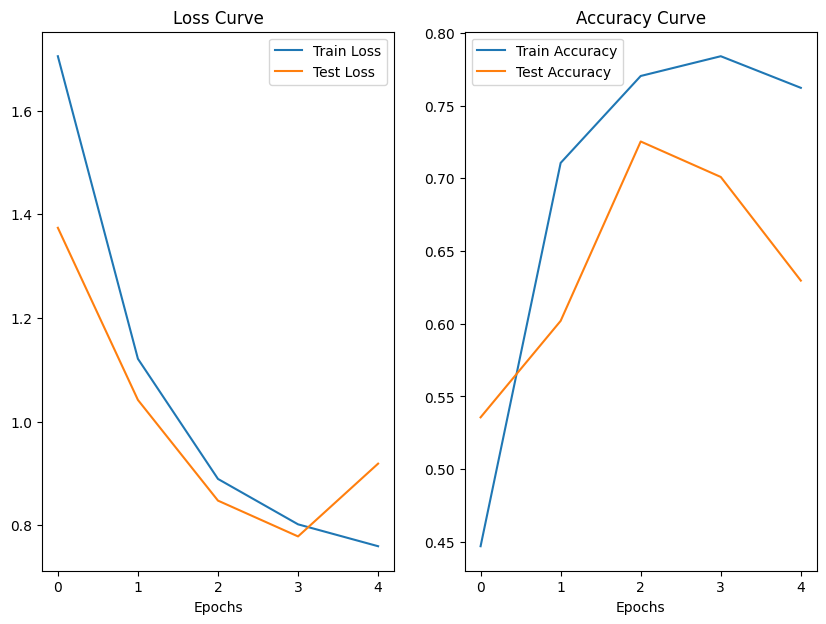

In [ ]:
plotting_loss_curves(results)

#Googlenet

In [ ]:
from torchvision.models import googlenet,GoogLeNet_Weights

##Downloading weights for model

In [ ]:
weights_gnet=GoogLeNet_Weights.DEFAULT
transforms_gnet=weights_gnet.transforms()
transforms_gnet

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

##Creating dataset and dataloader for model

In [ ]:
train_data_loader_gnet,test_data_loader_gnet,classes=datasets_dataloaders_creation(train_data_path=train_path,
                                                                                   test_data_path=test_path,
                                                                                   batchsize=32,
                                                                                   transform=transforms_gnet,)
len(train_data_loader_gnet),len(test_data_loader_gnet),classes

(23,
 6,
 ['Anthracnose',
  'algal leaf',
  'bird eye spot',
  'brown blight',
  'gray light',
  'healthy',
  'red leaf spot',
  'white spot'])

##Creating model instance


In [ ]:
model_gnet=googlenet(weights_gnet)
model_gnet

In [ ]:
summary_checker(model_gnet,[32,3,256,256])

Layer (type:depth-idx)                   Output Shape              Param #                   Trainable
GoogLeNet                                [32, 1000]                --                        True
├─BasicConv2d: 1-1                       [32, 64, 128, 128]        --                        True
│    └─Conv2d: 2-1                       [32, 64, 128, 128]        9,408                     True
│    └─BatchNorm2d: 2-2                  [32, 64, 128, 128]        128                       True
├─MaxPool2d: 1-2                         [32, 64, 64, 64]          --                        --
├─BasicConv2d: 1-3                       [32, 64, 64, 64]          --                        True
│    └─Conv2d: 2-3                       [32, 64, 64, 64]          4,096                     True
│    └─BatchNorm2d: 2-4                  [32, 64, 64, 64]          128                       True
├─BasicConv2d: 1-4                       [32, 192, 64, 64]         --                        True
│    └─Conv2d: 2-

##setting the features parameter to false for not tracking any gradients

In [ ]:
for param in model_gnet.parameters():
  param.requires_grad=False

In [ ]:
model_gnet.fc# the model pointing to

Linear(in_features=1024, out_features=1000, bias=True)

In [ ]:
model_gnet.fc=nn.Linear(
    in_features=1024, out_features=len(classes), bias=True

)

In [ ]:
model_gnet.fc# the model pointing to

Linear(in_features=1024, out_features=8, bias=True)

In [ ]:
for param in model_gnet.fc.parameters():
  param.requires_grad=True

In [ ]:
summary_checker(model_gnet,[32,3,256,256])

Layer (type:depth-idx)                   Output Shape              Param #                   Trainable
GoogLeNet                                [32, 8]                   --                        Partial
├─BasicConv2d: 1-1                       [32, 64, 128, 128]        --                        False
│    └─Conv2d: 2-1                       [32, 64, 128, 128]        (9,408)                   False
│    └─BatchNorm2d: 2-2                  [32, 64, 128, 128]        (128)                     False
├─MaxPool2d: 1-2                         [32, 64, 64, 64]          --                        --
├─BasicConv2d: 1-3                       [32, 64, 64, 64]          --                        False
│    └─Conv2d: 2-3                       [32, 64, 64, 64]          (4,096)                   False
│    └─BatchNorm2d: 2-4                  [32, 64, 64, 64]          (128)                     False
├─BasicConv2d: 1-4                       [32, 192, 64, 64]         --                        False
│    └─

##model building

In [ ]:
#batchsize and accuracy
batchsize=32
accuracy=Accuracy(task="multiclass",num_classes=len(classes)).to(device)


#setting up loss function and optimizer

loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model_gnet.parameters(),lr=0.1)

##model Building

results=model_building(train_data=train_data_loader_gnet,
                       test_data=test_data_loader_gnet,
                       model=model_gnet,
                       optimizer=optimizer,
                       accuracy=accuracy,
                       device=device,
                       no_of_epochs=5,loss_fn=loss_fn)

Epoch : 0-------------------------------------------
Trainloss : 26.415021896362305 | TrainAccuracy : 0.24320653080940247  | TestLoss : 17.337827682495117  | TestAccuracy  :0.3996710479259491 
Epoch : 1-------------------------------------------
Trainloss : 7.701871395111084 | TrainAccuracy : 0.5625  | TestLoss : 5.362476348876953  | TestAccuracy  :0.5981359481811523 
Epoch : 2-------------------------------------------
Trainloss : 4.1023101806640625 | TrainAccuracy : 0.63722825050354  | TestLoss : 3.8448309898376465  | TestAccuracy  :0.674616277217865 
Epoch : 3-------------------------------------------
Trainloss : 6.757317543029785 | TrainAccuracy : 0.63722825050354  | TestLoss : 1.832686424255371  | TestAccuracy  :0.7982456088066101 
Epoch : 4-------------------------------------------
Trainloss : 2.7769148349761963 | TrainAccuracy : 0.73777174949646  | TestLoss : 3.633228063583374  | TestAccuracy  :0.6452851295471191 


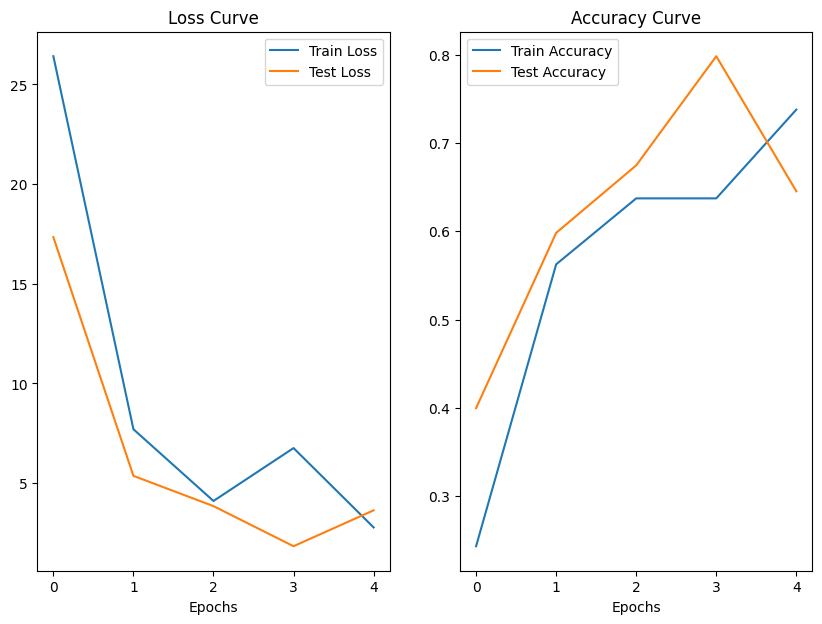

In [ ]:
plotting_loss_curves(results)

##Among these models Efficientnet_v2_s performs better
 * Increase iterations for efficient net

In [ ]:
from torchvision.models import efficientnet_v2_s,EfficientNet_V2_S_Weights
def model_efficientnet(train_path,test_path,batchsize):
  weights=EfficientNet_V2_S_Weights.DEFAULT
  transform=weights.transforms()
  batchsize=32
  train_data_loader,test_data_loader,classes=datasets_dataloaders_creation(train_path,test_path,
                                                                         batchsize=batchsize,
                                                                         transform=transform)
  model=efficientnet_v2_s(weights)
  for param in model.features.parameters():
    param.requires_grad=False

  model.classifier=nn.Sequential(
    nn.Dropout(p=0.2,inplace=True),
    nn.Linear(in_features=1280,out_features=len(classes),bias=True)
  )
  return train_data_loader,test_data_loader,classes,model

In [ ]:
accuracy=Accuracy(task="multiclass",num_classes=len(classes)).to(device)
batchsize=32
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.1)
train_data_loader,test_data_loader,classes,model_eff=model_efficientnet(train_path,test_path,batchsize)
results=model_building(train_data_loader,
                       test_data_loader,
                       model,
                       loss_fn,
                       optimizer,
                       accuracy,
                       device,
                       20)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(


Epoch : 0-------------------------------------------
Trainloss : 0.6862887144088745 | TrainAccuracy : 0.8070652484893799  | TestLoss : 0.8977475166320801  | TestAccuracy  :0.6938048601150513 
Epoch : 1-------------------------------------------
Trainloss : 0.612438440322876 | TrainAccuracy : 0.7880434989929199  | TestLoss : 0.7306345701217651  | TestAccuracy  :0.7182018160820007 
Epoch : 2-------------------------------------------
Trainloss : 0.5454150438308716 | TrainAccuracy : 0.8288043737411499  | TestLoss : 0.6875249147415161  | TestAccuracy  :0.7390351295471191 
Epoch : 3-------------------------------------------
Trainloss : 0.5667935609817505 | TrainAccuracy : 0.8369565606117249  | TestLoss : 0.5887494683265686  | TestAccuracy  :0.784265398979187 
Epoch : 4-------------------------------------------
Trainloss : 0.5482557415962219 | TrainAccuracy : 0.8505434989929199  | TestLoss : 0.6415417194366455  | TestAccuracy  :0.7513706088066101 
Epoch : 5---------------------------------

In [ ]:
results

{'trainloss': [0.6862887144088745,
  0.612438440322876,
  0.5454150438308716,
  0.5667935609817505,
  0.5482557415962219,
  0.5305450558662415,
  0.475753515958786,
  0.4818781316280365,
  0.4488008916378021,
  0.4360317587852478,
  0.45683199167251587,
  0.4922952353954315,
  0.42763838171958923,
  0.43057745695114136,
  0.38253170251846313,
  0.42254287004470825,
  0.4523029923439026,
  0.39105263352394104,
  0.3574676513671875,
  0.4392169415950775],
 'trainaccuracy': [0.8070652484893799,
  0.7880434989929199,
  0.8288043737411499,
  0.8369565606117249,
  0.8505434989929199,
  0.8125,
  0.8505434989929199,
  0.85597825050354,
  0.845108687877655,
  0.854619562625885,
  0.84375,
  0.8383152484893799,
  0.866847813129425,
  0.8817934989929199,
  0.8913043737411499,
  0.8600543737411499,
  0.832880437374115,
  0.8804348111152649,
  0.9021739363670349,
  0.8573369979858398],
 'testloss': [0.8977475166320801,
  0.7306345701217651,
  0.6875249147415161,
  0.5887494683265686,
  0.641541719

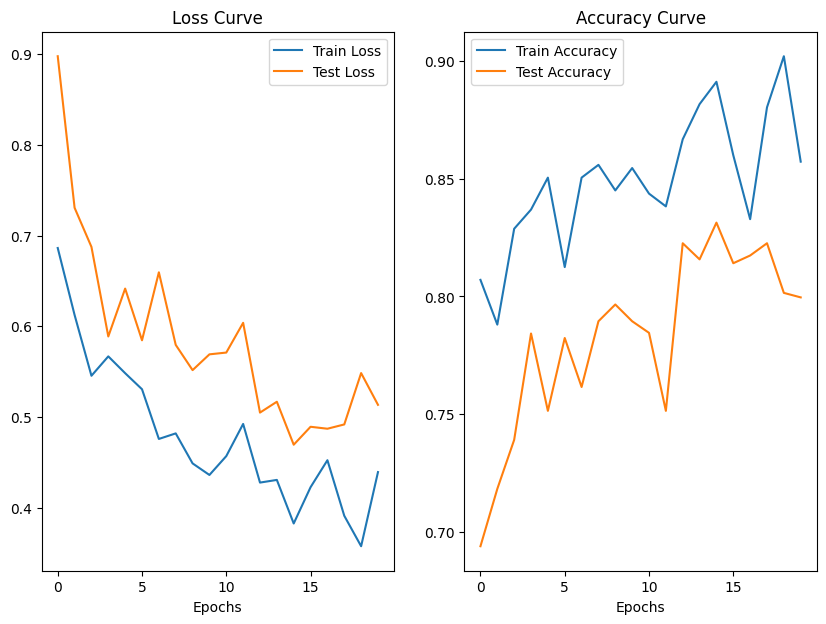

In [ ]:
plotting_loss_curves(results)

In [ ]:
save_model(model,"Models","efficientnet_v2_s.pth")

##predictions on random test samples

In [ ]:
def make_predictions(model,
                     data,
                     device):
  pred_labels=[]
  model=model.to(device)
  for sample in data:
    sample=sample.to(device)
    y_pred=model(sample.unsqueeze(0))
    pred_labels.append(y_pred.squeeze().argmax(dim=0).item())
  return pred_labels


In [ ]:
import random
test_samples=[]
test_labels=[]
test_dataset=ImageFolder(root=test_path,transform =transform)
for sample,label in random.sample(list(test_dataset),k=9):
  test_samples.append(sample)
  test_labels.append(label)
test_samples[0].shape

torch.Size([3, 384, 384])

In [ ]:
pred_labels=make_predictions(model,test_samples,device)
pred_labels

[1, 7, 5, 7, 0, 4, 4, 5, 6]

In [ ]:
test_labels

[1, 7, 5, 7, 0, 4, 4, 5, 6]

#Visualize the result

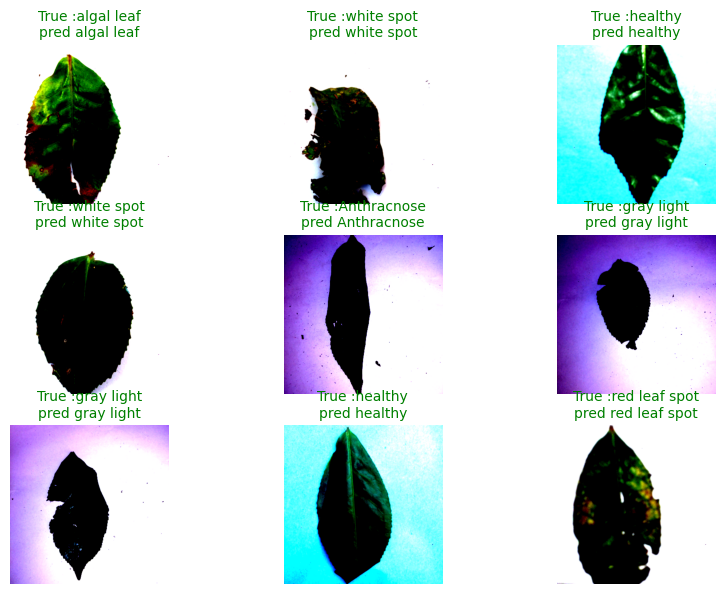

In [ ]:
plt.figure(figsize=(10,7))

col,row=3,3

for i,sample in enumerate(test_samples,start=1):
  plt.subplot(col,row,i)
  plt.imshow(sample.permute(1,2,0))

  pred_label=pred_labels[i-1]
  true_label=test_labels[i-1]
  if(pred_label==true_label):

     plt.title(f"True :{classes[true_label] }\npred {classes[pred_label]}",fontsize=10,c='g')
  else:
    plt.title(f"True :{classes[true_label] }\npred {classes[pred_label]}",fontsize=10,c='r')
  plt.axis("off")



#saving model

In [ ]:
from pathlib import Path
path=Path("Models")
path.mkdir(parents=True,exist_ok=True)
efficient_net_path=path/"EFFICIENT_NET_B0.pth"
torch.save(obj=model.state_dict(),f=efficient_net_path)

In [5]:
import torch
from torchvision.models import efficientnet_v2_s,EfficientNet_V2_S_Weights
from torch import  nn
device="cuda" if torch.cuda.is_available() else "cpu"
weights= EfficientNet_V2_S_Weights.DEFAULT
model_saved=efficientnet_v2_s()


for param in model_saved.features.parameters():
  param.requires_grad=False
model_saved.classifier=nn.Sequential(
    nn.Dropout(p=0.2,inplace=True),
    nn.Linear(in_features=1280,out_features=8,bias=True)
)
model_saved.to(device)
model_saved.load_state_dict(torch.load("efficientnet_v2_s.pth",map_location=torch.device('cpu')))

<All keys matched successfully>

In [10]:
next(iter(model_saved.parameters())).device

device(type='cpu')

In [6]:
classes=['Anthracnose',
  'algal leaf',
  'bird eye spot',
  'brown blight',
  'gray light',
  'healthy',
  'red leaf spot',
  'white spot']
  

In [36]:
from pathlib import Path
examples=list(Path("examples").glob("*.jpg"))
examples

[WindowsPath('examples/Anthrancose.jpg'),
 WindowsPath('examples/brownblight.jpg'),
 WindowsPath('examples/redleafspot.jpg')]

In [8]:
import random
examples=[[str(file) for file in examples]]
examples

[['examples\\Anthrancose.jpg',
  'examples\\brownblight.jpg',
  'examples\\redleafspot.jpg']]

In [23]:
from model import model


import torch
import torchvision.models
from timeit import default_timer as timer
classes=['Anthracnose',
  'algal leaf',
  'bird eye spot',
  'brown blight',
  'gray light',
  'healthy',
  'red leaf spot',
  'white spot']
effnetv2,transform=model(len(classes))
effnetv2.load_state_dict(torch.load(f="efficientnet_v2_s.pth",map_location=torch.device('cpu')))
def predict(img):
    start=timer()
    transformed_image=transform(img).unsqueeze(0)
    effnetv2.eval()
    with torch.inference_mode():
        predictions=torch.softmax(effnetv2(transformed_image),dim=1)
        pred_labels_and_probs={classes[i]:float(predictions[0][i]) for i in range(len(classes))}

        pred_time=round(timer()-start,5
                        )
    return pred_labels_and_probs,pred_time
        

    

In [33]:
try :
    import gradio as gr
except:
    !pip -q install gradio
    import gradio as gr

print(gr.__version__)

d:\Anaconda\envs\ML\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


4.0.2


In [31]:
from PIL import Image
img=Image.open(examples[0][2])
predict(img)

({'Anthracnose': 1.0544929864408914e-05,
  'algal leaf': 8.185797923943028e-06,
  'bird eye spot': 2.8048754757037386e-05,
  'brown blight': 1.753053038555663e-05,
  'gray light': 1.4428095482799108e-06,
  'healthy': 1.978909676836338e-05,
  'red leaf spot': 0.9998408555984497,
  'white spot': 7.356049172813073e-05},
 0.57211)

In [35]:
examples

[['examples\\Anthrancose.jpg',
  'examples\\brownblight.jpg',
  'examples\\redleafspot.jpg']]

In [37]:
title="Tea_Leaf_Disease_Classification_UsingPytorch"
description="Classify the Input images of diseased leaves into their respective classes"
article="[Model](https://github.com/Suryaranji/TeaLeafDiseaseClassification_Using_Pytorch.git)"
demo =gr.Interface(
    fn=predict,
    inputs=gr.Image(type='pil'),
    outputs=[gr.Label(num_top_classes=3,label="predictions"),
             gr.Number(label="Time")],
    examples=examples,
    title=title,
    description=description,
    article=article
)
demo.launch(debug=False,
            share=True)

Running on local URL:  http://127.0.0.1:7861

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


In [40]:
gr.__version__

'4.0.2'

In [43]:
!ls /TEALEAFCLASSIFICATION

'ls' is not recognized as an internal or external command,
operable program or batch file.
